In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


# Shark Attacks

### IMPORT & DEF DOCUMENT

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns # Importing the Seaborn library for advanced data visualization (as sns)
import matplotlib.pyplot as plt # Importing the Matplotlib library for basic plotting functionalities (as plt)

In [3]:
df = pd.read_excel("/Users/roraimachavez/Downloads/7.IRONHACK/Mini projects/second_week/GSAF5.xls")

## GENERAL INFORMATION

In [4]:
df.info() #General info of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [5]:
df.shape

(6969, 23)

`NUMBER OF COLUMS`: 23

`NUMBER OF ROWS`: 6969

`TYPES OF COLUMNS`: float64(2), object(21)

## CLEAN OF THE DATAFRAME:

`1. We delete columns that are not necessary`

`2. Delete nulls values`

`3. Delete duplicate rows.`


In [6]:
# Check column per column so we can see the info and decide if is necessary or not
df["Date"].unique()

array(['15 Mar 2024', '04 Mar 2024', '02 Mar-2024', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

    We focus out analysis in the last 20 year of shark attacks, so we decide to delete colomns and rows that are not necessary.

In [7]:
# Delete columns that are not necesary 
df = df.drop(["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22", "Unnamed: 11", "Time","Location","Name"], axis=1)

# Convert columns names to in lower case
df.columns = df.columns.str.lower()

In [8]:
df.head()

,date,year,type,country,state,activity,sex,age,injury,species,source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Swimming,F,13,"Minor injuries to back, abdomen and legs",Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,Surfing,M,NaN,"No injury, shark bit surfboard",Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,Swimming,F,11,Lacerations to left foot,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,NaN,F,46,Leg bitten,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,Fishing,M,32,Calf of lower left leg injured,"Bull shark, 7'","Times of India, 2/14/2024"


In [9]:
# We delete rows. We are only using data since 2004 to 2024 (20 years).
df_filter = df.loc[(df['year'] > 2003) & (df['year'] <= 2024)] 
df = df_filter.copy() #assign the new dataframe to the old one

In [10]:
# Delete duplicates rows
df_drop_duplicates = df.drop_duplicates()
df = df_drop_duplicates.copy()

# There wasn't any duplicates rows

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2324 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2219 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   1458 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


In [12]:
df.shape

(2324, 11)

`NUMBER OF COLUMS: 11`

`NUMBER OF ROWS: 2324`

## TRANSFOR VALUES IN COLUMNS

`1.Check values`

`2.Define values so they can follow same logic`


### TRANSFORMING TYPE

In [13]:
df["type"].unique()

array(['Unprovoked', ' Provoked', 'Provoked', 'Questionable',
       'Watercraft', 'Sea Disaster', nan, '?', 'Unconfirmed',
       'Unverified', 'Invalid', 'Under investigation'], dtype=object)

`TRANSFORMATION`

We decide to organize them to four categories:
- 'Unprovoked'
- 'Provoked'
- 'Unconfirmed' = 'Unverified' , 'Invalid', 'Questionable', 'Under investigation', '?'
- 'Exogens'= 'Watercraft', 'Sea Disaster'

In [14]:
df.shape

(2324, 11)

In [15]:
#To replace a word for another one.
df = df.replace(to_replace = [" Provoked"], value = [["Provoked"]]) #Tambien se puede hacer de esta forma: df['Type'] = df['Type'].str.replace(" ", "")
df = df.replace(to_replace = ['Unverified' , 'Invalid', 'Questionable', 'Under investigation', '?'], value = 'Unconfirmed') 
df = df.replace(to_replace=['Watercraft', 'Sea Disaster'], value='Exogens')

In [16]:
df["type"].unique()

array(['Unprovoked', 'Provoked', 'Unconfirmed', 'Exogens', nan],
      dtype=object)

In [17]:
df.shape

(2324, 11)

### TRANSFORMING COUNTRY

In [18]:
#General view of the countrys
df["country"].unique()

array(['AUSTRALIA', 'USA', 'INDIA', 'TRINIDAD', 'BAHAMAS', 'SOUTH AFRICA',
       'MEXICO', 'NEW ZEALAND', 'EGYPT', 'Mexico', 'BELIZE',
       'PHILIPPINES', 'Coral Sea', 'SPAIN', 'PORTUGAL', 'SAMOA',
       'COLOMBIA', 'ECUADOR', 'FRENCH POLYNESIA', 'NEW CALEDONIA',
       'TURKS and CaICOS', 'CUBA', 'BRAZIL', 'SEYCHELLES', 'ARGENTINA',
       'FIJI', 'MeXICO', 'Maldives', 'South Africa', 'ENGLAND', 'JAPAN',
       'INDONESIA', 'JAMAICA', 'MALDIVES', 'THAILAND', 'COLUMBIA',
       'COSTA RICA', 'New Zealand', 'British Overseas Territory',
       'CANADA', 'JORDAN', 'ST KITTS / NEVIS', 'ST MARTIN',
       'PAPUA NEW GUINEA', 'REUNION ISLAND', 'ISRAEL', 'CHINA', 'IRELAND',
       'ITALY', 'MALAYSIA', 'LIBYA', nan, 'MAURITIUS', 'SOLOMON ISLANDS',
       'ST HELENA, British overseas territory', 'COMOROS', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'CAPE VERDE', 'Fiji',
       'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE',
       'PUERTO RICO', 'ATLANTIC OC

In [19]:
df.shape

(2324, 11)

After a general overview, we concluded that:
- We have to title all countrys.
- For some countrys we have to chance and define the country.

.ENGLAND:"BRITISH OVERSEAS TERRITORY", 'ST HELENA, BRITISH OVERSEAS TERRITORY'

. AUSTRALIA: "CORAL SEA"

. PALESTINA: PALESTINIAN TERRITORIES

In [20]:
#We replace some countrys:
df = df.replace(to_replace=["British Overseas Territory", 'ST HELENA, British overseas territory'], value='ENGLAND')
df = df.replace(to_replace=["CORAL SEA"], value='AUSTRALIA')
df = df.replace(to_replace=["PALESTINIAN TERRITORIES"], value='PALESTINA')


In [21]:
#We transfor everything to uppercase:
df['country'] = df['country'].str.title()

In [22]:
df["country"].unique()

array(['Australia', 'Usa', 'India', 'Trinidad', 'Bahamas', 'South Africa',
       'Mexico', 'New Zealand', 'Egypt', 'Belize', 'Philippines',
       'Coral Sea', 'Spain', 'Portugal', 'Samoa', 'Colombia', 'Ecuador',
       'French Polynesia', 'New Caledonia', 'Turks And Caicos', 'Cuba',
       'Brazil', 'Seychelles', 'Argentina', 'Fiji', 'Maldives', 'England',
       'Japan', 'Indonesia', 'Jamaica', 'Thailand', 'Columbia',
       'Costa Rica', 'Canada', 'Jordan', 'St Kitts / Nevis', 'St Martin',
       'Papua New Guinea', 'Reunion Island', 'Israel', 'China', 'Ireland',
       'Italy', 'Malaysia', 'Libya', nan, 'Mauritius', 'Solomon Islands',
       'Comoros', 'Reunion', 'United Kingdom', 'United Arab Emirates',
       'Cape Verde', 'Dominican Republic', 'Cayman Islands', 'Aruba',
       'Mozambique', 'Puerto Rico', 'Atlantic Ocean', 'Greece',
       'St. Martin', 'France', 'Trinidad & Tobago', 'Kiribati',
       'Diego Garcia', 'Taiwan', 'Palestina', 'Guam', 'Nigeria', 'Tonga',
       'S

In [23]:
df.shape

(2324, 11)

### TRANSFORMING ACTIVITY

In [24]:
#General view of the activities
unicos = df["activity"].unique()
for i in unicos:
    print(i)
len(unicos)

Swimming
Surfing
nan
Fishing
Spearfishing
Free diving
Foil Boarding
Wading
Snorkeling
Paddle boarding
Scuba diving
On a round-the-world expedition
Kayak fishing
Towing a dead whale out to sea
Boogie boarding
Freediving
Sitting
Watching the sardine run
Standing
Filming
Kite surfing
Jumped overboard
Diving for crayfish
Windsurfing
Kite-Surfing
Surf-sking
Diving with  surface-supplied air
Spearishing
Snorkeling at Shark Feeding site
Diving/Shark Feeding
Diving
Surf skiing 
Shipwreck
Swimming  or Snorkeling
Kayaking
Paddleboarding
Lobstering
Lifeguard Training Exercise
Lifeguard Exercises
Scalloping
Jumped into water
Playing in the water
Feeding sharks & stingrays
Fihing
Surface Supplied  Diving
Floating in inflatable pool ring
Fishing for sharks
Wing Foil Surfing
Swimmingq
Playing
Fishing, fell in water
Harassing sharks
Squatting in the water
Moving captive shark
Jackass Team's publicity stunt for Discovery Channel's Shark Week 2021
Canoeing
Parasailing
Kite Foiling
Baiting sharks
Boggie 

289

**What are we gonna do here after see the general view:**

`Define values:`
  
- Board activities/sports
- Swimming activities/sports
- Playing or floating in the water
- Fishing activities
- Boat activities
- Other

In [25]:
df.shape

(2324, 11)

In [26]:
# Dict per activity 
dict_activity = {
    # Board Activities/Sports
    r'[Ss]urf|[Bb]oard|[Bb]og|[Ff]oil|[Kk]ite|[Ss]ail|[Pp]addle|[Kk]aya': 'Board activities/sports',
    # Swimming Activities/Sports
    r'[Ss]wimming|[Ss]norke|[Ff]ree|[Dd]iving|[Tt]reading|[Mm]arathon': 'Swimming activities/sports',
    # Playing or Floating in the Water
    r'[Pp]lay|[Ff]loat|[Ss]it|[Ss]tand|[Jj]ump|[Bb]ath|[Ss]occer|[Cc]rawling|[Ww]ash|[Ss]and|[Ll]ife|[Ss]quat|[Ss]ee': 'Playing or floating in the water',
    # Fishing Activities
    r'"[Ff]ish|[Ll]obster|[Cc]rab|[Ss]hrimp|[Tt]agg|[Ss]hark|[Ff]eed|[Hh]arass|[Dd]ragg"gm': 'Fishing activities',
    #Boat Activities
    r'[Bo]at|[Ss]hip': "Boat activities",
    # Other
    r'[Ff]ilming|[Dd]olphins|[Dd]isaster|[Rr]escu|[Aa]ttempt|[Hh]ands|[Tt]ouch': 'Other'
}

In [27]:
# Function to categorize activities
def categorize_activities(text, dict_activity):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in dict_activity.items():
            if re.search(pattern, text):
                return category
    return "Other"  # If it does not match any category, "Other" is returned.

# Clear invalid values in the "activity" column
df["activity"] = df["activity"].fillna("empty")  # Fill NaN values with an empty string
df["activity"] = df["activity"].astype(str)  # Convert all values to text strings

# Apply the function to categorize activities
df["activity"] = df["activity"].apply(lambda x: categorize_activities(x, dict_activity))

In [28]:
df["activity"].unique()

array(['Swimming activities/sports', 'Board activities/sports', 'Other',
       'Playing or floating in the water', 'Boat activities',
       'Fishing activities'], dtype=object)

In [29]:
count_activity = df["activity"].value_counts()
print(count_activity)

activity
Board activities/sports             957
Swimming activities/sports          614
Other                               594
Playing or floating in the water     91
Fishing activities                   59
Boat activities                       9
Name: count, dtype: int64


In [30]:
df.shape

(2324, 11)

### TRANSFORMING SPECIES

In [31]:
# Rename column name because it has a space to delete. 
df.rename(columns={'species ': 'species'}, inplace=True)

In [32]:
# General view of the species
unicos = df["species"].unique()
for i in unicos:
    print(i)
len(unicos)

Tiger shark
Tiger shark 8'
3' to 4' shark
Bull shark, 7'
Blacktip reef shark
Bull shark
nan
White shark
Raggedtooth shark
White shark, 13'
Broze whaler?
Sevengill shark
Shark involment not confirmed
1.8m bull shark
Lemon shark
Oceanic whitetip shark
White Shark, 4.5 m
8' tiger shark
Bronze whaler, 6'
Nurse shark, 5' to 6'
10' tiger shark
10' to 12' Galapagos shark
Tiger shark?
Cookiecutter sharks
White shark, 3.8-4.2m
Blue shark
Wfite shark
Wobbegong shark
8' shark
4' shark
3' shark
Sand tiger shark
Tiger sharks
Tiger shark, 13'
Caribbean rreef shark
Grey reef shark, 2 m
Caribbean reef shark
Shark involvement not confirmes
Bull shark, 4'
1m shark
Bull shark, 6'
Bronze whaler shark, 1.5 m
Tiger shark, 8'-10'
Blacktip reef shark 5'
Authorities report injury caused bya barracuda
5m to 6m shark
A small shark
Mako shark
Nurse shark
Blacktip
Tiger  shark?
Juvenile white shark
5'shark
3m shark
Juvenile nurse shark
Bu.ll
Bronze whaler
White shark, 3 m
Blacktip shark
Bull shark, 9'
Blacktip sha

687

In [33]:
df.shape

(2324, 11)

In [34]:
dict_species = {
    r"[Tt]iger": "Tiger Shark",
    r"[Bb]ull": "Bull Shark",
    r"[Ww]hite": "White Shark",
    r"[Bb]lack": "Black Shark",
    r"[Bb]ronze": "Bronze Shark",
    r"[Ll]emon": "Lemon Shark"}

In [35]:
# Function to categorize species
def categorize_activities(text, dict_activity):
    if isinstance(text, str):  # Check if the value is a text string
        for pattern, category in dict_activity.items():
            if re.search(pattern, text):
                return category
    return "Other"  # If it does not match any category, "Other" is returned.

# Clear invalid values in the "activity" column
df["species"] = df["species"].fillna("empty")  # Fill NaN values with an empty string
df["species"] = df["species"].astype(str)  # Convert all values to text strings

# Apply the function to categorize activities
df["species"] = df["species"].apply(lambda x: categorize_activities(x, dict_species))

In [36]:
df["species"].unique()

array(['Tiger Shark', 'Other', 'Bull Shark', 'Black Shark', 'White Shark',
       'Lemon Shark', 'Bronze Shark'], dtype=object)

In [37]:
count_activity = df["species"].value_counts()
print(count_activity)

species
Other           1598
White Shark      289
Tiger Shark      157
Bull Shark       144
Black Shark       75
Bronze Shark      35
Lemon Shark       26
Name: count, dtype: int64


In [38]:
df.shape

(2324, 11)

### TRANSFORMING DATE

- We have to convert all numbers and put them with the same structure
- We have to convert the type to Data

In [39]:
# General view of the date
df.shape

(2324, 11)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2324 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2324 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   2324 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


In [41]:
df["date"] = df["date"].str.replace("Reported ", "") # We change this so we can delete the word Reported from 107 values.

In [42]:
unicos = df["date"].unique() # Check the date column
for i in unicos:
    print(i)
len(unicos)

15 Mar 2024
04 Mar 2024
02 Mar-2024
25 Feb-2024
14 Feb-2024
04-Feb-2024
29 Jan-2024
15 Jan-2024
09-Jan-2024
05-Jan-2024
30 Dec-2023
29 Dec-2023
28 Dec-2023
25 Dec-2023
24-Dec-2023
18 Dec-2023
14  Dec-2023
08 Dec-2023
04 Dec-2023
02 Dec-2023
30 Nov-2023
21 Nov-2023
10 Nov-2023
05 Nov-2023
03 Nov-2023
02 Nov-2023
31 Oct-2023
25 Oct 2023
23 Oct-2023
21 Oct-2023
20 Oct 2023
15 Oct 2023
13 Oct-2023
02 Oct-2023
01 Oct-2023
18 Sep-2023
13 Sep-2023
12 Sep-2023
11 Sep-2023
09 Sep- 2023
06-Sep-2023
04 Sep 2023
25 Aug 2023
23 Aug-2023
22 Aug-2023
21 Aug-2023
16 Aug-2023
12 Aug-2023
07 Aug-2023
31 Jul-2023
30 Jul-2023
29 Jul-2023
24 Jul-2023
22 Jul-2023
21 Jul-2023
18 Jul-2023
15 Jul-2023
14 Jul-2023
04 Jul-2023
03 Jul-2023
23-Jun-2023
14-June 2023
08-Jun 2023
07-Jun-2023
28-May 2023
24-May 2023
24 May 2023
21-May 2023
19 -May 2023
18-May-2023
14-May-2023
13-May-2023
11-May-2023
09 May-2023
05-May-2023
03-May-2023
01-May-2023
29-Apr-2023
23-Apr-2023
22-Apr-2023
11-Apr-2023
09-Apr-2023
25-Mar-2023


1922

In [43]:
count_date = df["date"].value_counts() # Check the lenght of values
print(count_date)

date
29-Apr-2017    4
14-Jun-2012    4
04 Jul-2023    4
15-Apr-2018    4
26-Jun-2008    4
              ..
25-Aug-2016    1
27-Aug-2016    1
Sep-2016       1
01-Sep-2016    1
2004           1
Name: count, Length: 1922, dtype: int64


In [44]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%d-%b-%Y')# Convert the 'Date' column to a datetime format
df['date'] = df['date'].dt.date

In [45]:
df.shape

(2324, 11)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324 entries, 0 to 2324
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2148 non-null   object 
 1   year      2324 non-null   float64
 2   type      2310 non-null   object 
 3   country   2322 non-null   object 
 4   state     2220 non-null   object 
 5   activity  2324 non-null   object 
 6   sex       2236 non-null   object 
 7   age       1735 non-null   object 
 8   injury    2316 non-null   object 
 9   species   2324 non-null   object 
 10  source    2315 non-null   object 
dtypes: float64(1), object(10)
memory usage: 217.9+ KB


In [47]:
count_date = df["date"].value_counts() # Check the length and realease that we have nulls values.
print(count_date)

date
2017-04-29    4
2008-06-26    4
2014-12-28    4
2012-06-14    4
2015-09-20    4
             ..
2015-02-09    1
2015-02-14    1
2015-02-15    1
2015-03-07    1
2024-02-04    1
Name: count, Length: 1768, dtype: int64


In [48]:
num_nans = df['date'].isna().sum() # Check how many nulls values do we have.
print(num_nans)

176


In [49]:
df.dropna(subset=['date'], inplace=True) # Delete nulls values. We dicede delete them since it wasn't that many and they won't affect to out analysis. 

In [50]:
num_nans = df['date'].isna().sum() # Check how many nulls values do we have. 
print(num_nans)

0


In [51]:
df.shape # Checking how many rows we have left. 

(2148, 11)

In [52]:
df['date'] = pd.to_datetime(df['date']) # Now that we don't have any nulls values we can convert the column again to datetime format

In [53]:
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Making new column with "months" taking information of date column.
df['months'] = df['date'].dt.month.map(months)

In [54]:
df.head()

,date,year,type,country,state,activity,sex,age,injury,species,source,months
5,2024-02-04,2024.0,Provoked,Trinidad,NaN,Other,M,NaN,Shoulder bitten,Black Shark,"Trinidad Guardian, 2/11/2014",February
8,2024-01-09,2024.0,Unprovoked,Australia,South Australia,Board activities/sports,M,64,Leg bitten,White Shark,"A. Currie, GSAF",January
9,2024-01-05,2024.0,Provoked,South Africa,Eastern Cape Province,Other,M,62,Provoked incident. Lacerations and puncture wo...,Other,Jacaranda fm. 12/6/2024,January
14,2023-12-24,2023.0,Unprovoked,Australia,Western Australia,Board activities/sports,M,46,Puncture wounds to right ankle,Other,"9 News, 12/25/2023",December
43,2023-09-06,2023.0,Exogens,Coral Sea,NaN,Other,M,NaN,Catamaran severely damaged by sharks. No injur...,Other,"B. Myatt, GSAF",September


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 5 to 2323
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2148 non-null   datetime64[ns]
 1   year      2148 non-null   float64       
 2   type      2134 non-null   object        
 3   country   2147 non-null   object        
 4   state     2056 non-null   object        
 5   activity  2148 non-null   object        
 6   sex       2078 non-null   object        
 7   age       1615 non-null   object        
 8   injury    2141 non-null   object        
 9   species   2148 non-null   object        
 10  source    2139 non-null   object        
 11  months    2148 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 218.2+ KB


### TRANSFORMING YEAR

We have to convert year in date format. 

In [56]:
# We make a general view of this column
unicos = df["year"].unique()
for i in unicos:
    print(i)
len(unicos)

2024.0
2023.0
2022.0
2021.0
2020.0
2019.0
2018.0
2017.0
2016.0
2015.0
2014.0
2013.0
2012.0
2011.0
2010.0
2009.0
2008.0
2007.0
2006.0
2005.0
2004.0


21

In [57]:
count_year = df["year"].value_counts()
print(count_year)

year
2015.0    141
2017.0    137
2016.0    127
2011.0    121
2014.0    121
2018.0    120
2009.0    117
2008.0    116
2019.0    114
2012.0    114
2021.0    107
2007.0    105
2013.0     99
2020.0     98
2005.0     98
2022.0     96
2010.0     96
2006.0     94
2004.0     86
2023.0     38
2024.0      3
Name: count, dtype: int64


In [58]:
# We decide to change it to int so we can calculate more things whit it and it looks better than float format. 
df['year'] = df['year'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 5 to 2323
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2148 non-null   datetime64[ns]
 1   year      2148 non-null   int64         
 2   type      2134 non-null   object        
 3   country   2147 non-null   object        
 4   state     2056 non-null   object        
 5   activity  2148 non-null   object        
 6   sex       2078 non-null   object        
 7   age       1615 non-null   object        
 8   injury    2141 non-null   object        
 9   species   2148 non-null   object        
 10  source    2139 non-null   object        
 11  months    2148 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 218.2+ KB


In [60]:
df.head()

,date,year,type,country,state,activity,sex,age,injury,species,source,months
5,2024-02-04,2024,Provoked,Trinidad,NaN,Other,M,NaN,Shoulder bitten,Black Shark,"Trinidad Guardian, 2/11/2014",February
8,2024-01-09,2024,Unprovoked,Australia,South Australia,Board activities/sports,M,64,Leg bitten,White Shark,"A. Currie, GSAF",January
9,2024-01-05,2024,Provoked,South Africa,Eastern Cape Province,Other,M,62,Provoked incident. Lacerations and puncture wo...,Other,Jacaranda fm. 12/6/2024,January
14,2023-12-24,2023,Unprovoked,Australia,Western Australia,Board activities/sports,M,46,Puncture wounds to right ankle,Other,"9 News, 12/25/2023",December
43,2023-09-06,2023,Exogens,Coral Sea,NaN,Other,M,NaN,Catamaran severely damaged by sharks. No injur...,Other,"B. Myatt, GSAF",September


## VISUALIZATION

1. In the last 20 years, what was the year with the most attacks?
2. At what time of the year do the most attacks occur?
3. In which country do sharks attack the most? 
4. What species of sharks do they attack most often?
5. What kind of activities were the people who suffered shark attacks doing?

BONUS: Do sharks usually attack by provocation?

`1.In the last 20 years, what was the year with the most attacks?`

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

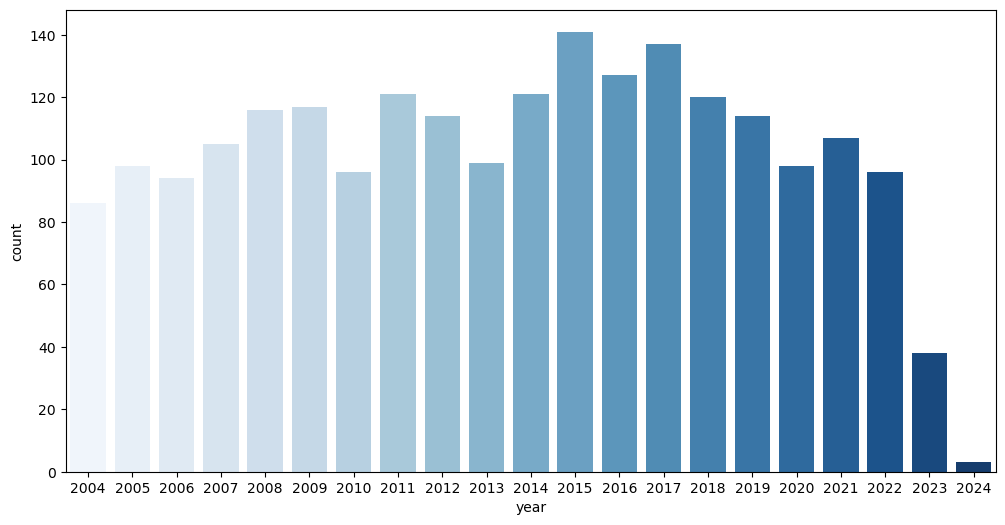

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="year", palette="Blues");

`2. At what time of the year do the most attacks occur?`

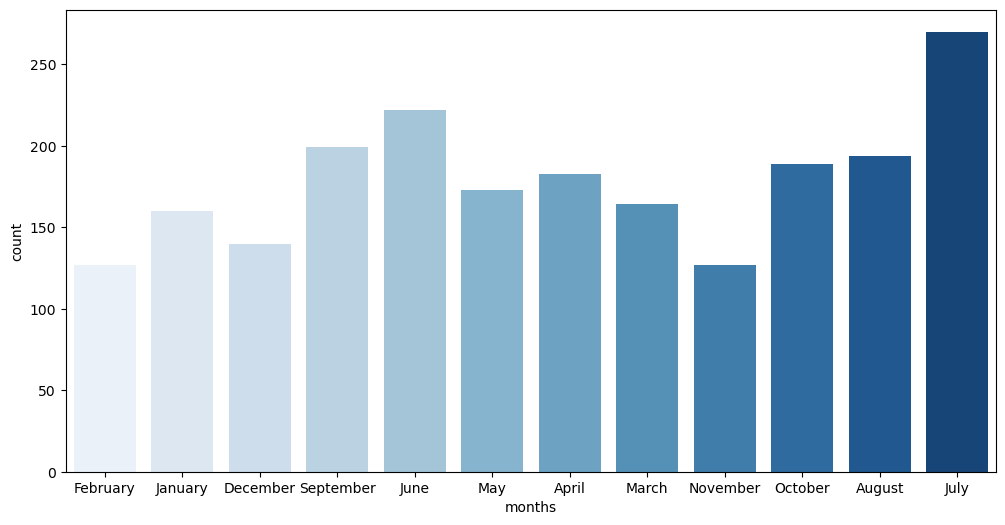

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="months", palette="Blues");

`In which country do sharks attack the most?`

In [79]:
df['country'].value_counts()

country
Usa             1019
Australia        453
South Africa     132
Bahamas           62
Brazil            49
                ... 
Diego Garcia       1
Palestina          1
Nigeria            1
Saudi Arabia       1
Uruguay            1
Name: count, Length: 96, dtype: int64

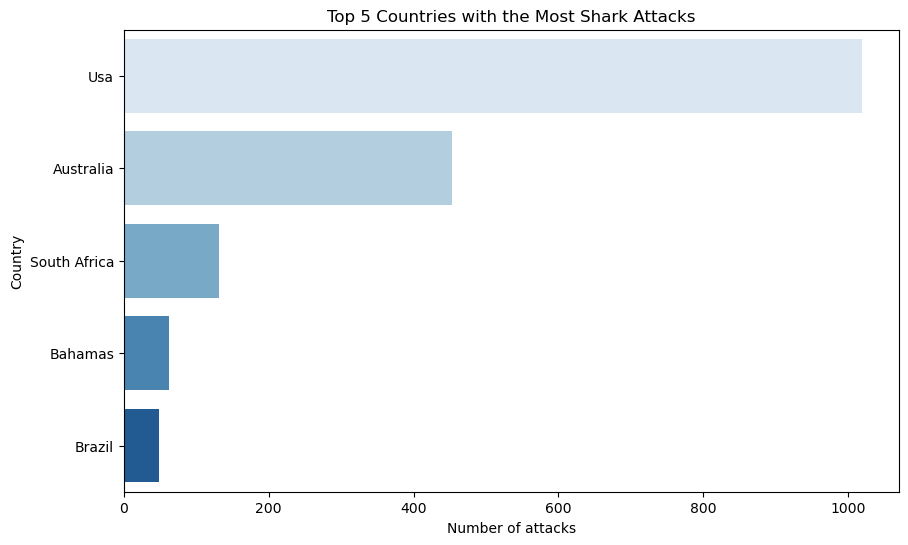

In [100]:
# Top countries.
top_5 = df['country'].value_counts().head(5)

# Visualization.
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5.values, y=top_5.index, palette='Blues')
plt.xlabel('Number of attacks')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Most Shark Attacks')
plt.show()

`What species of sharks do they attack most often?`

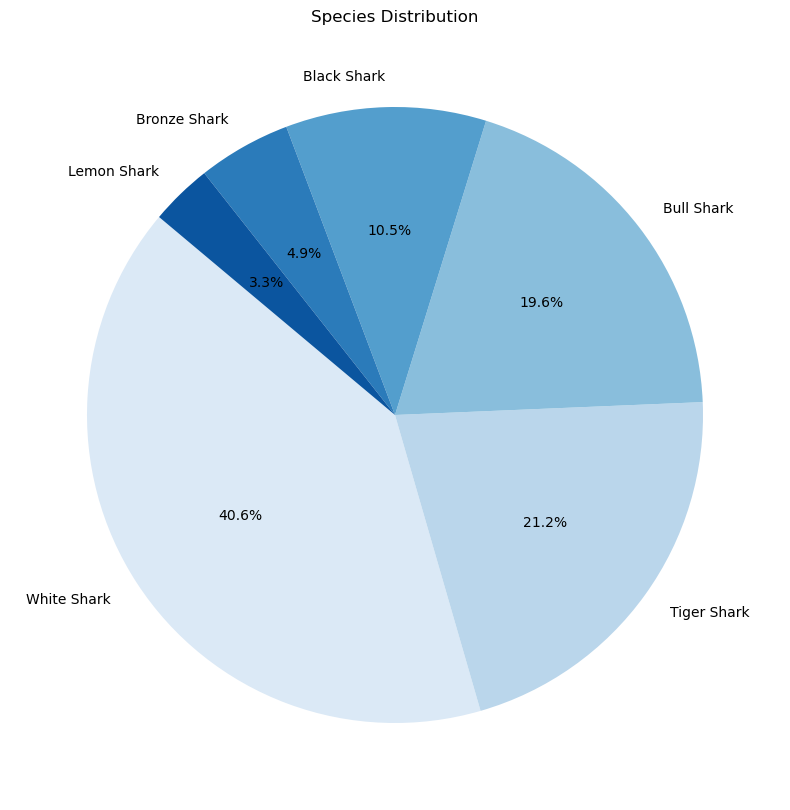

In [98]:
# Calculate the frequency of each species but no with other because we don't want it for our analysis
species_counts = df[df['species'] != 'Other']['species'].value_counts() 

# Color palette
colors = sns.color_palette('Blues', len(species_counts))

plt.figure(figsize=(16, 10))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Species Distribution')
plt.show()


`What kind of activities were the people who suffered shark attacks doing?`

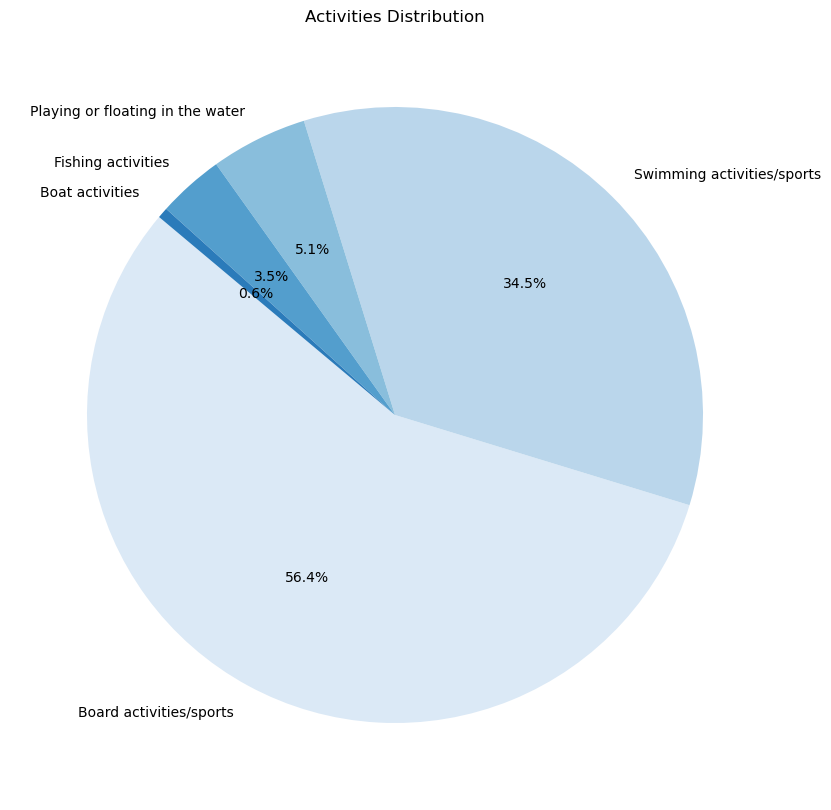

In [104]:
activity_counts = df[df['activity'] != 'Other']['activity'].value_counts() 
plt.figure(figsize=(16, 10))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Activities Distribution')
plt.show()

`BONUS: Do sharks usually attack by provocation?`

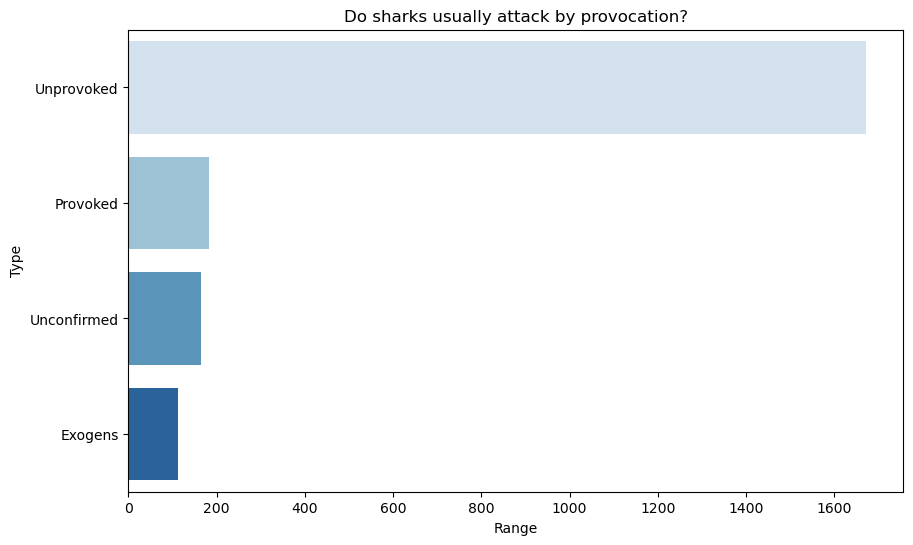

In [106]:
count_type = df['type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=count_type.values, y=count_type.index, palette='Blues')
plt.xlabel('Range')
plt.ylabel('Type')
plt.title('Do sharks usually attack by provocation?')
plt.show()